In [14]:
compare_dsu = []
compare_veb = []
compare_fib = []

In [15]:
V = None
E = None
EdgeList = []
my_file=open('/home/neil/Documents/IIITH/sem1/APS/CS3000-Project/infile.txt','r')
read_data = my_file.readlines()
#print(read_data)
my_file.close()
global EdgeList
#print(read_data)
E = int(read_data[0])
V = int(read_data[1])
for i in range(2,3*E+2,3):
    u = int(read_data[i])
    v = int(read_data[i+1])
    w = int(read_data[i+2])
    lst=[]
    lst.append(w)
    lst.append(u)
    lst.append(v)
    #print(lst)
    EdgeList.append(lst)
EdgeList.sort(key = lambda x: x[0],reverse=True)
print(len(EdgeList))
print (E)

7667
7667


In [28]:
import sys
import math
import time 
import random
from collections import defaultdict

BASE = 2

class vEBLeaf(object):
    def __init__(self, word_size):
        self.word_size = word_size
        self.values = [False,False]

    def min(self):
        for i in range(2):
            if self.values[i]:
                return i
        return None
    
    def max(self):
        for i in range(1,-1,-1):
            if self.values[i]:
                return i
        return None

    def insert(self, x):
        self.values[x] = True

    def delete(self, x):
        self.values[x]= False

    def successor(self, x):
        if(x+1)>=len(self.values):
            return None
        else:
            try:
                return self.values[x+1:].index(True) + x +1
            except ValueError:
                return None

class vEBTree(object):
    def __init__(self, word_size):
        self.min_ = self.max_ = None
        self.word_size =  word_size
        self.summary_size = int(math.ceil(self.word_size/2))
        self.cluster = [None]*(1<<self.summary_size)
        self.summary = vEB.of_size(self.summary_size)

    def __contains__(self,x):
        if self.min_ is None:
            return False
        elif self.min_ == x:
            return True
        else:
            high = self.high(x)
            low = self.low(x)
            if self.cluster[high] is None:
                return False
            else:
                return low in self.cluster[high]
    
    def __iter__(self):
        if self.min_ is None:
            return 
        yield self.min_

        current = self.min_
        while current != self.max_:
            current = self.successor(current)
            yield current

    def high(self, x):
        return x>>int(self.summary_size)

    def low(self, x):
        return x&((1<<int(self.summary_size))-1)

    def index(self, i, j):
        return i*(1<<self.summary_size) + j

    def insert(self, x):
        if self.min_ is None:
            self.min_ = self.max_ = x
            return
        if x == self.min_:
            return
        if x<self.min_:
            self.min_, x = x, self.min_
        if x>self.max_:
            self.max_ = x

        cluster_index = self.high(x)
        element_index = self.low(x)
        clustr = self.cluster[cluster_index]
        if clustr is None:
             clustr = self.cluster[cluster_index] = vEB.of_size(self.summary_size)

        if clustr.min is None:
            self.summary.insert(cluster_index)

        clustr.insert(element_index)
    def max(self):
        return self.max_
    def min(self):
        return self.min_
    def successor(self, x):
        if self.min_ is None or x>=self.max_:
            return None
        elif x <self.min_:
            return self.min_
        cluster_index = self.high(x)
        element_index = self.low(x)
        clustr = self.cluster[cluster_index]

        if clustr and element_index < clustr.max:
            element_index = clustr.successor(element_index)
            return self.index(cluster_index, element_index)
        else:
            cluster_index = self.summary.successor(cluster_index)
            element_index = self.cluster[cluster_index].min
            return self.index(cluster_index, element_index)


    def delete(self, x):
        if self.min_ is None or x<self.min_:
            return
            
        if x == self.min_:
            if self.summary is None or self.summary.min is None:
                self.min_ = self.max_ = None
                return
            cluster_index = self.summary.min
            element_index = self.cluster[cluster_index].min

            x = self.min = self.index(cluster_index, element_index)

        cluster_index = self.high(x)
        element_index = self.low(x)
        clustr = self.cluster[cluster_index]

        if clustr is None:
            return 
        clustr.delete(element_index)

        if clustr.min is None:
            self.summary.delete(cluster_index)

        if x==self.max_:
            if self.summary.max is None:
                self.max_ = self.min_
            else:
                cluster_index = self.summary.max
                element_index = self.cluster[cluster_index].max
                self.max_ = self.index(cluster_index, element_index)

class vEB(object):
    @classmethod
    def of_size(cls, word_size):
        return vEBLeaf(word_size) if word_size<BASE else vEBTree(word_size)


In [29]:
%%time
from collections import defaultdict

nodes = defaultdict(list)
class edge:
    def __init__(self,u,v):
        self.u = u
        self.v = v
class UnionFind:
    def __init__(self, N):
        self.rank = [0 for i in range(N+1)]
        self.p = [0 for i in range(N+1)]
        for i in range(N+1):
            self.p[i] = i

    def findSet(self, i):
        if (self.p[i] == int(i)):
            return i
        else:
            self.p[i] = self.findSet(self.p[i])
            return self.p[i]

    def isSameSet(self, i, j):
        return self.findSet(i) == self.findSet(j)

    def unionSet(self, i, j):
        if not self.isSameSet(i, j):
            x = self.findSet(i)
            y = self.findSet(j)
            if self.rank[x] > self.rank[y] :
                self.p[y] = x
            else:
                self.p[x] = y
                if self.rank[x] == self.rank[y] :
                    self.rank[y] += 1

def kruskal(h: vEB):
    time_start = time.clock()
    mst_cost = 0
    global EdgeList
    UF = UnionFind(V)
    temp = h.min
    for i in range(E):
        # x, y, z = EdgeList[i]
        #print(temp)
        x=temp
        y=0
        z=0
        if nodes[temp]:
            tmp = nodes.get(temp)
            nodes.pop(temp,None)
            #print(tmp[0])
            y = tmp[0].u
            z = tmp[0].v
            tmp.pop(0)
            #tmp.pop(0)
            #print(tmp)
            #print (y)
            #print (z)
            if tmp:
                nodes[temp].extend(tmp)
            else:
                temp = h.successor(temp)
        #print("In Kruskal {0}, {1}".format(x,y))
        if not UF.isSameSet(y, z):
            #print(mst_cost)
            mst_cost += x
            UF.unionSet(y,z)
            #print(mst_cost)
            #print(temp)
    time_elapsed = (time.clock() - time_start)
    print(time_elapsed)
    compare_veb.append((time_elapsed, E))
    return mst_cost


if __name__ == "__main__":
    #run your code
    global compare_veb
    global V
    global E
    global EdgeList
    global compare
    h = vEB.of_size(32)
    for i in range(E):
        w, u, v = EdgeList[i]
        h.insert(w)
        nodes[w].append(edge(u,v))
#         nodes[w].append(u)
#         nodes[w].append(v)
    print(kruskal(h))
    

0.006774000000007163
0
CPU times: user 167 ms, sys: 0 ns, total: 167 ms
Wall time: 167 ms


In [30]:
%%time
class UnionFind:
    def __init__(self, N):
        self.rank = [0 for i in range(N+1)]
        self.p = [0 for i in range(N+1)]
        for i in range(N+1):
            self.p[i] = i

    def findSet(self, i):
        if (self.p[i] == int(i)):
            #print(i)
            return i
        else:
            self.p[i] = self.findSet(self.p[i])
            return self.p[i]

    def isSameSet(self, i, j):
        return self.findSet(i) == self.findSet(j)

    def unionSet(self, i, j):
        if not self.isSameSet(i, j):
            x = self.findSet(i)
            y = self.findSet(j)
            if self.rank[x] > self.rank[y] :
                self.p[y] = x
            else:
                self.p[x] = y
                if self.rank[x] == self.rank[y] :
                    self.rank[y] += 1

def mergeSort(nlist):
    #print("Splitting ",nlist)
    if len(nlist)>1:
        mid = len(nlist)//2
        lefthalf = nlist[:mid]
        righthalf = nlist[mid:]

        mergeSort(lefthalf)
        mergeSort(righthalf)
        i=j=k=0       
        while i < len(lefthalf) and j < len(righthalf):
            if lefthalf[i][0] < righthalf[j][0]:
                nlist[k]=lefthalf[i]
                i=i+1
            else:
                nlist[k]=righthalf[j]
                j=j+1
            k=k+1

        while i < len(lefthalf):
            nlist[k]=lefthalf[i]
            i=i+1
            k=k+1

        while j < len(righthalf):
            nlist[k]=righthalf[j]
            j=j+1
            k=k+1
            
def kruskal():
    mst_cost = 0
    global V
    global E
    global EdgeList
    UF = UnionFind(V)
    for i in range(E):
        x, y, z = EdgeList[i]
        #print("In Kruskal {0}, {1}".format(y,z))
        if not UF.isSameSet(y, z):
            #print(mst_cost)
            mst_cost += x
            UF.unionSet(y,z)
            #print(mst_cost)
            #print(x)
    return mst_cost


if __name__ == "__main__":
    time_start = time.clock()
    global compare_dsu
    global EdgeList
    global V
    global E
    mergeSort(EdgeList)
    #print(EdgeList)
    print (kruskal())
    time_elapsed = (time.clock() - time_start)
    print(time_elapsed)
    compare_dsu.append((time_elapsed, E))

2403701840554
0.08688399999999774
CPU times: user 87.2 ms, sys: 0 ns, total: 87.2 ms
Wall time: 86.5 ms


In [31]:
import math
## Fib Heap
class FibHeap:
    def __init__(self):
        self.n = 0
        self.min = None
        self.root = []

## Fib Heap intenalTree
class Node:
    def __init__(self, val, x: int, y: int):
        self.degree = 0
        self.parent = None
        self.child = []
        self.mark = False
        self.key = val
        self.right = self
        self.x = x
        self.y = y

def makeNode():
    return Node()


def makeFibHeap():
    return FibHeap()

##Insert
def FibHeapInsert(h: FibHeap, node: Node):
    if(h.min == None):
        h.root = [node]
        h.min = node
    else:
        h.root.append(node)
        h.root[len(h.root)-2].right = node
        h.root[len(h.root)-1].right = h.root[0]
        if(node.key < h.min.key):
            h.min = node
    h.n = h.n + 1
#     print("printing root list")
#     for x in h.root:
#         print(x.key)

def D(n: int):
    #     print("log value = {0}".format(int(math.log2(n))+1))
    return int(math.log2(n))+1

def FibHeapLink(h: FibHeap, y, x):
    #     print("In link, root size {0}".format(len(h.root)))
    #     print("In link, x = {0}, y = {1}".format(x.key, y.key))
    h.root.remove(y)
    x.child.append(y)
    x.degree = x.degree+1
    y.mark = False
#     print("In link, abcd root size {0}".format(len(h.root)))


def consolidate(h: FibHeap):
    A = [None for i in range(0,D(h.n)+1)]
    #     print("In consolodate, root size {0}".format(len(h.root)))
    #     for w in h.root:
    #         print("Test consolodate, w= {0}".format(w.key))
    #         print("Test consolodate, w= {0}".format(w.degree))
    #     for i in range(0,len(h.root)):
    i = 0
    while(i < len(h.root)):
        #         print("In beginning i = {0}, root len {1}".format(i, len(h.root)))
        w = h.root[i]
        #         print("In consolodate, w= {0}".format(w.key))
        x = w
        d = x.degree
        #         print("x degree = {0}".format(x.degree))
        while not A[d] == None:
            #             print("In while x degree = {0}".format(x.degree))
            y = A[d]
            if x.key > y.key:
                temp = x
                x = y
                y = temp
            FibHeapLink(h, y, x)
            A[d] = None
            d = d+1
            i = i-1
        A[d] = x
        i = i+1
    for w in A:
        h.min = None
    for i in range(0, D(h.n)+1):
        if not A[i] == None:
            if h.min == None:
                h.root = [A[i]]
                h.min = A[i]
            else:
                h.root.append(A[i])
                if(A[i].key < h.min.key):
                    h.min = A[i]


##Extract min
def FibExtractMin(h: FibHeap):
    z = h.min
    if(not z == None):
        for x in z.child:
            h.root.append(x)
            x.parent = None
        h.root.remove(z)
        if(z == z.right):
            h.min = None
        else:
            h.min = z.right
            #             print("before consolodate {0}".format(h.min.key))
            #             print("before consolodate root size {0}".format(len(h.root)))
            consolidate(h)
        #             print("after consolodate root size {0}".format(len(h.root)))
        h.n = h.n - 1
    return z

In [32]:
%%time
class UnionFind:
    def __init__(self, N):
        self.rank = [0 for i in range(N+1)]
        self.p = [0 for i in range(N+1)]
        for i in range(N+1):
            self.p[i] = i

    def findSet(self, i: int):
        if (self.p[i] == i):
            return i
        else:
            self.p[i] = self.findSet(self.p[i])
            return self.p[i]

    def isSameSet(self, i, j):
        return self.findSet(i) == self.findSet(j)

    def unionSet(self, i, j):
        if not self.isSameSet(i, j):
            x = self.findSet(i)
            y = self.findSet(j)
            if self.rank[x] > self.rank[y] :
                self.p[y] = x
            else:
                self.p[x] = y
                if self.rank[x] == self.rank[y] :
                    self.rank[y] += 1

def Kruskal(h: FibHeap):
    time_start = time.clock()
    global compare_fib
    mst_cost = 0
    global EdgeList
    UF = UnionFind(V)
    for i in range(E):
        # x, y, z = EdgeList[i]
        temp = FibExtractMin(h)
        x = temp.key
        y = temp.x
        z = temp.y
        #print("In Kruskal {0}, {1}".format(y,z))
        if not UF.isSameSet(y, z):
            mst_cost += x
            UF.unionSet(y,z)
    time_elapsed = (time.clock() - time_start)
    print(time_elapsed)
    compare_fib.append((time_elapsed, E))
    return mst_cost

if __name__ == "__main__":
    h = makeFibHeap()
    global V
    global E
    global EdgeList
    for i in range(E):
        w, u, v = EdgeList[i]
        FibHeapInsert(h, Node(w, u, v))
    print(Kruskal(h))

0.1719070000000329
2403701840554
CPU times: user 193 ms, sys: 3.97 ms, total: 197 ms
Wall time: 196 ms


In [33]:
print (compare_dsu)
print (compare_veb)
print (compare_fib)

[(0.09676600000000235, 7667), (0.08688399999999774, 7667)]
[(0.10391299999997727, 7667), (0.006774000000007163, 7667)]
[(0.12371200000001181, 7667), (0.1719070000000329, 7667)]


In [34]:
compare_dsu.sort(key = lambda x: x[1])
compare_veb.sort(key = lambda x: x[1])
compare_fib.sort(key = lambda x: x[1])
with open('compare_dsu_rsorted.txt', 'w') as f:
    for x,y in compare_dsu:
        f.write("{0} {1}\n".format(x,y))
with open('compare_veb_rsorted.txt', 'w') as f:
    for x,y in compare_veb:
        f.write("{0} {1}\n".format(x,y))
with open('compare_fib_rsorted.txt', 'w') as f:
    for x,y in compare_fib:
        f.write("{0} {1}\n".format(x,y))
len(compare_dsu)

2

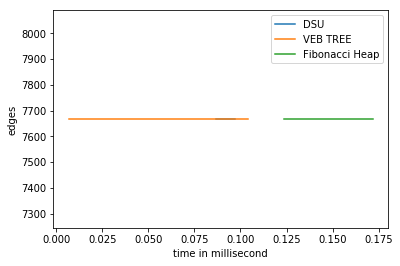

In [35]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.ylabel('edges')
plt.xlabel('time in millisecond')
list1 = []
list2 = []
for x,y in compare_dsu:
    #print(x)
    #print(y)
    list1.append(x)
    list2.append(y)
plt.plot(list1, list2, label="DSU")
list1 = []
list2 = []
for x,y in compare_veb:
    #print(x)
    #print(y)
    list1.append(x)
    list2.append(y)
plt.plot(list1, list2, label="VEB TREE")
list1 = []
list2 = []
for x,y in compare_fib:
    #print(x)
    #print(y)
    list1.append(x)
    list2.append(y)
plt.plot(list1, list2, label="Fibonacci Heap")
plt.legend()